In [1]:
import pandas as pd
import backtest
import stat_arb

In [2]:
data = pd.read_pickle("data/sp600_max_1d.pkl")["Close"]
data.drop(['MOG.A', 'CWEN.A'], axis=1, inplace=True)
data = data[data.index > "1-1-2020"]
comb_df = stat_arb.get_pairs(data)

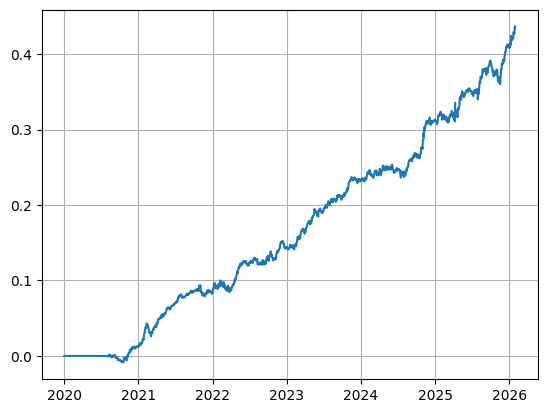

,Stats
SR,2.208354
Max Drawdown,-0.022622
Minimum,-0.008662
Maximum,0.436605
Win Rate,0.560958
Average Win,0.001419
Average Loss,-0.001214
Expected Value,0.000263


In [3]:
stock_pairs =  comb_df.sort_values(by="adf").head(100)
log_returns = stat_arb.stat_arb_backtest(data, stock_pairs, n=150, leverage=1, t_costs=0.0005, z_entry=2)
backtest.plotStrat(log_returns)
backtest.calc_stats(log_returns)